In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('kddcup99_csv (1).csv')

In [3]:
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   label  
0                       0.0  normal  
1                       0.0  normal  
2                       0.0  normal  
3                       0.0  normal  
4                       0.0  normal  

[5 rows x 42 columns]

In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [6]:
df.shape

(494020, 42)

In [7]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
Name: service, dtype: int64


In [9]:
from sklearn import preprocessing

In [10]:
lab=preprocessing.LabelEncoder()

In [11]:
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])

In [12]:
df.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       22     9        181       5450     0   
1         0              1       22     9        239        486     0   
2         0              1       22     9        235       1337     0   
3         0              1       22     9        219       1337     0   
4         0              1       22     9        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   label  
0                       0.0  normal  
1                       0.0  normal  
2                       0.0  normal  
3                       0.0  normal  
4                       0.0  normal  

[5 rows x 42 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

### Rename all label: 0=normal, 1=DoS, 2=Probe, R2L and U2R.

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow’’ attacks;
probing: surveillance and other probing, e.g., port scanning.

In [14]:
df1=df['label']

In [15]:
print('Label distribution Training set:')
print(df['label'].value_counts())

Label distribution Training set:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [16]:
newdf=df1.replace({'normal':0,'smurf':1,'neptune':1,'back':1,'satan':2,'ipsweep':2,'portsweep':2,'warezclient': 2,'teardrop': 1,
                  'pod': 1,'nmap' : 2,'guess_passwd': 2,'buffer_overflow': 2,'land': 1,'warezmaster': 2,'imap': 2,'rootkit': 2,
                  'loadmodule': 2,'ftp_write': 2,'multihop': 2,'phf': 2,'perl': 2,'spy': 2})

In [17]:
print(newdf.head())
#newdf.to_csv('label.csv')

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [18]:
df['label'] = newdf
df.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       22     9        181       5450     0   
1         0              1       22     9        239        486     0   
2         0              1       22     9        235       1337     0   
3         0              1       22     9        219       1337     0   
4         0              1       22     9        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  label  
0                       0.0      0  
1                       0.0      0  
2                       0.0      0  
3                       0.0      0  
4                       0.0      0  

[5 rows x 42 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

# Feature Selection

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [21]:
X = df.iloc[:,df.columns!='label'] 
y = df.iloc[:,df.columns=='label']   

In [22]:
model.fit(X,y)
print(model.feature_importances_)

[8.13226902e-04 8.06020022e-02 2.18015077e-02 3.35571746e-02
 1.07522320e-02 1.31795856e-03 3.25494802e-05 7.63886996e-03
 1.07093689e-05 1.14628615e-02 2.25777848e-04 1.51318379e-01
 4.08164473e-03 1.33593058e-04 4.37759342e-06 5.18830491e-05
 4.35130372e-05 1.71192888e-05 2.50028778e-05 0.00000000e+00
 0.00000000e+00 9.01875648e-04 1.23258540e-01 9.85104788e-02
 2.70689942e-02 1.74722561e-02 1.09060582e-02 1.24525523e-02
 8.32547992e-02 1.16644596e-02 8.39972117e-03 7.63147161e-02
 2.92213804e-02 3.66235843e-02 1.46982112e-02 4.59100251e-02
 7.28100319e-03 2.36037036e-02 2.77197755e-02 1.39454761e-02
 6.90200708e-03]


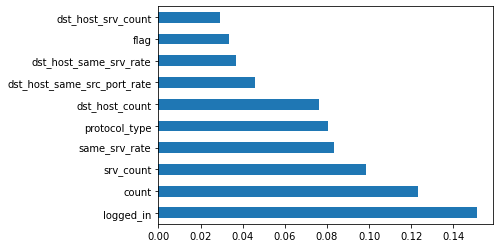

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [25]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [26]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

Specs         Score
4            src_bytes  6.116996e+10
5            dst_bytes  2.308604e+09
0             duration  9.867518e+07
22               count  3.954004e+07
23           srv_count  3.519352e+07
31      dst_host_count  3.922659e+06
32  dst_host_srv_count  6.381743e+05
9                  hot  3.765047e+05
11           logged_in  2.675627e+05
1        protocol_type  1.361731e+05

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.33)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier()

In [31]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [32]:
predic=rf.predict(xtest)

In [33]:
acc1=accuracy_score(predic,ytest)
acc1

0.9997791776822245

In [34]:
clf=classification_report(predic,ytest)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32080
           1       1.00      1.00      1.00    129230
           2       0.99      0.99      0.99      1717

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



In [35]:
from sklearn import svm

In [36]:
sv=svm.LinearSVC()

In [37]:
sv.fit(xtrain,ytrain)

LinearSVC()

In [38]:
predic1=sv.predict(xtest)

In [39]:
acc2=accuracy_score(predic1,ytest)
acc2

0.9889895538775786

In [40]:
clf1=classification_report(predic1,ytest)
print(clf1)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     32837
           1       0.99      1.00      1.00    128832
           2       0.72      0.92      0.81      1358

    accuracy                           0.99    163027
   macro avg       0.90      0.96      0.93    163027
weighted avg       0.99      0.99      0.99    163027



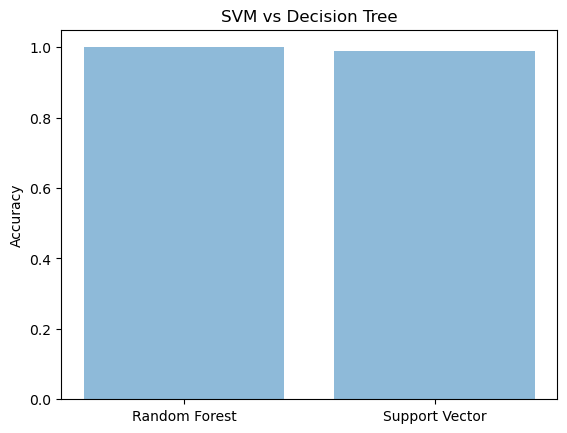

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest','Support Vector')
y_pos = np.arange(len(objects))
performance = [acc1,acc2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs Decision Tree')

plt.show()

In [42]:
!pip install keras
!pip install tensorflow

In [43]:
import numpy as np
import pandas as p
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [44]:
lstm_output_size = 70

In [45]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, activation="relu", input_shape=(41, 1)))
cnn.add(Convolution1D(64, 3, activation="relu"))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Convolution1D(128, 3, activation="relu"))
cnn.add(Convolution1D(128, 3, activation="relu"))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

In [46]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", 
            metrics=['accuracy'])
print(cnn.summary())
checkpointer = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/HDF5 Models/checkpoint-{epoch:02d}.hdf5", 
                                         verbose=1, save_best_only=True, 
                                         monitor='val_acc',mode='max')
csv_logger = CSVLogger('C:/Users/Eslavath Ramesh/Desktop/project delivarycnntrainanalysis3.csv',separator=',', append=False)
cnn.fit(xtrain, ytrain, epochs=5, batch_size=10, validation_data=(xtest, ytest))
cnn.save("C:/Users/Eslavath Ramesh/Desktop/project delivary/cnn_model.hdf5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 128)           0         
 1D)                                                    